In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LinearRegression


#We parse the data as datetime type to be able to manipulate dates as data and not strings
parsed_date = ['date']
df = pd.read_csv('kc_house_data.csv', parse_dates=parsed_date) 



In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
#We can see below we have successfully read date as datetime

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [10]:
df.sort_values(by='date', inplace=True, ascending=False)

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
# Above we can see that the max value for bedrooms is 33, which most likely it's an error, since we don't know
# if it is a typo or bad data we decided to remove this row

remove = df.loc[df['bedrooms'] == 33]
df_clean = df.drop(remove.index, axis=0, inplace=False)

In [13]:
df_clean['sqft_basement'].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [14]:
# Basements series have 454 rows of unknown values, since we don't know if there is a basement or not in these properties
# we will replace '?' for zero values

df_clean.loc[df_clean['sqft_basement'] == '?']

df_clean.replace({'sqft_basement': '?'}, {'sqft_basement': 0}, inplace=True)

In [15]:
# This line is just to ensure that our code above has worked correctly and no '?' remains on our data
df_clean.loc[df_clean['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [16]:
# We check correlation matrix to help identify highly correlated continue variables to help predict our target (price)

df.corr()



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


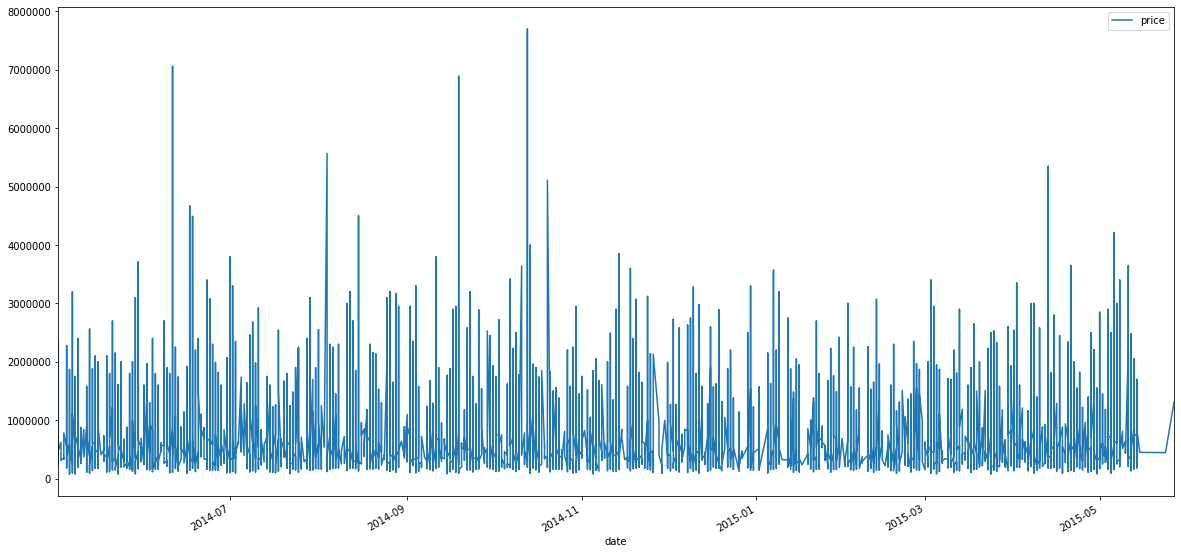

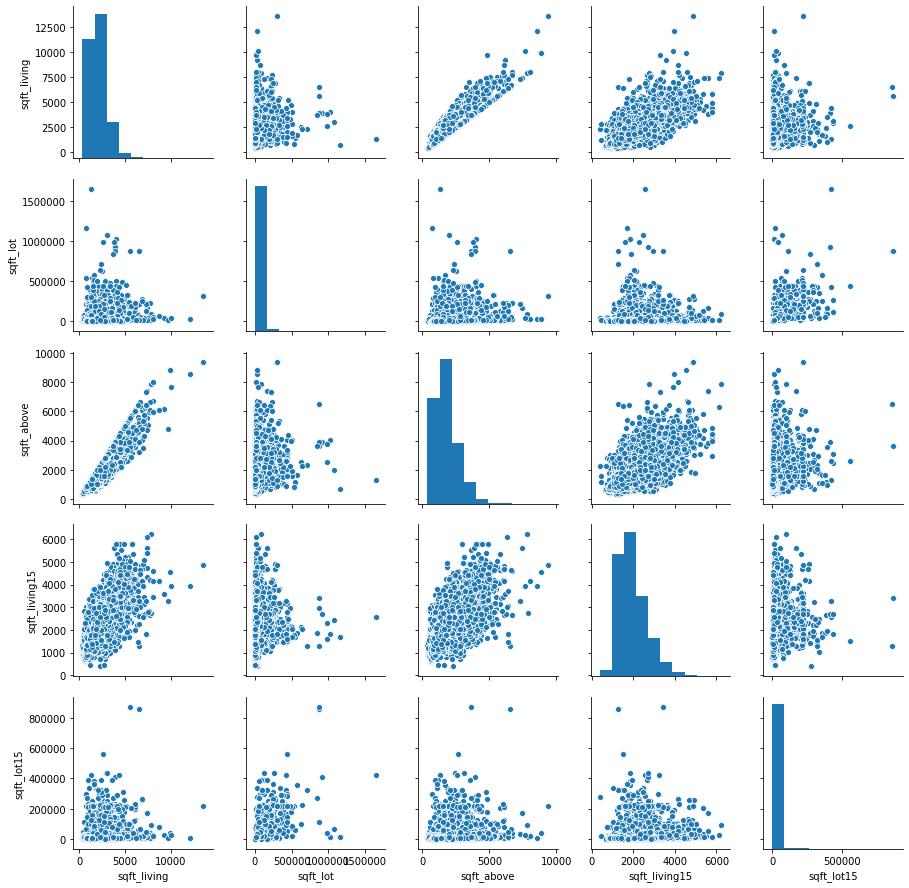

In [17]:
df_clean.head()

df_clean.plot(x='date', y='price', figsize = (20,10))

plot_df = df.loc[:,['sqft_living', 'sqft_lot','sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]

sns.pairplot(plot_df)

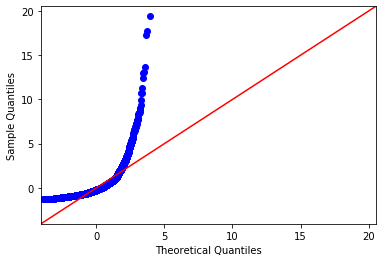

In [18]:
fig = sm.qqplot(df_clean['price'], fit=True, line='45')
plt.show()

In [7]:
#We first check our dependent variable distribution by ploting an histogram. As we can see below normality is not met.

#sns.heatmap(features.corr(), center=0)
sns.distplot(df_clean.price) 

NameError: name 'df_clean' is not defined

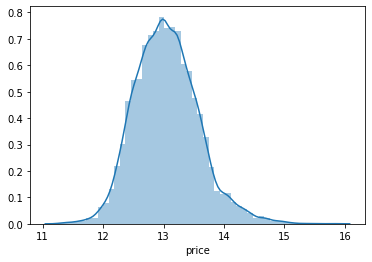

In [23]:
# In order to achieve normality we take natural log of our dependent variable (price). 
# As we can see in the grahp below the distribution is closer to a normal distribution bell shape

df_clean['price'] = df_clean['price'].map(lambda x: np.log(x))

sns.distplot(df_clean.price)



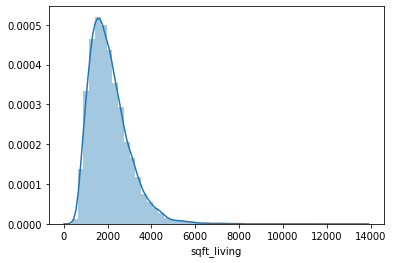

In [24]:
# Since we are looking for correlated variables to help explain price we check normality for sqft of living space. 
# Similar to the price, the distribution is highly left skewed 

sns.distplot(df_clean.sqft_living)

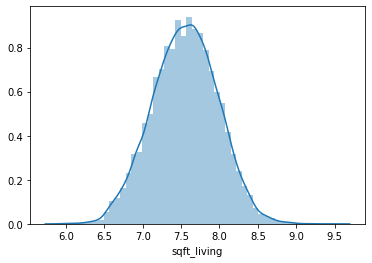

In [25]:
# As we did previously with our variable price, we take natural log of our predictor variable to reach normality 
# Now our target avariable and independent variable meet the normality criteria 

df_clean['sqft_living'] = df_clean['sqft_living'].map(lambda x: np.log(x))

sns.distplot(df_clean.sqft_living)

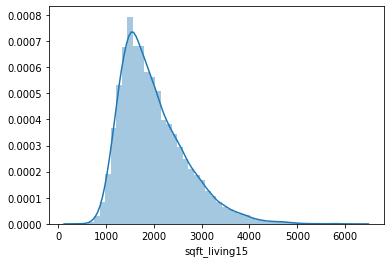

In [26]:
sns.distplot(df_clean.sqft_living15)

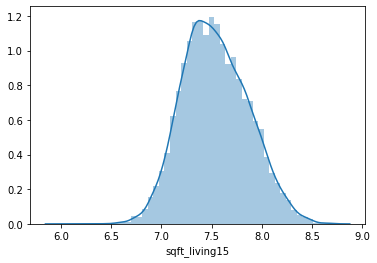

In [27]:
df_clean['sqft_living15'] = df_clean['sqft_living15'].map(lambda x: np.log(x))

sns.distplot(df_clean.sqft_living15)

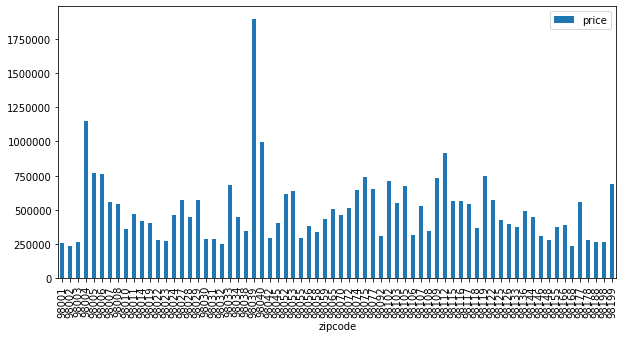

In [28]:
group_a = df.groupby('zipcode').median()
group_a.plot.bar(y='price', figsize=(10,5))

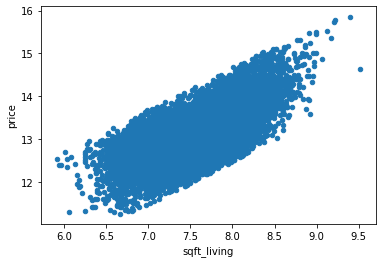

In [29]:
df_clean.plot.scatter(x='sqft_living', y='price')

### Model 1: Finding a good fit

In [30]:
# Pre-processing

y = df_clean['price']

X = df_clean.loc[:,['grade', 'sqft_living', 'sqft_living15']]


X.head()
#X = df_clean.apply(lambda x: np.log(x))

X.corr()

,grade,sqft_living,sqft_living15
grade,1.000000,0.743036,0.689050
sqft_living,0.743036,1.000000,0.746839
sqft_living15,0.689050,0.746839,1.000000


In [31]:
# Setting up the LEARNER
X = sm.add_constant(X) #x is sqft_living
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.55
const            7.6614
grade            0.1885
sqft_living      0.3520
sqft_living15    0.1705
dtype: float64


In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     8843.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:34:27   Log-Likelihood:                -8137.9
No. Observations:               21596   AIC:                         1.628e+04
Df Residuals:                   21592   BIC:                         1.632e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.6614      0.066    115.732      0.000       7.532       7.791
grade             0.1885      0.003     58.792      0.000       0.182       0.195
sqft_living       0.3520      0.010     36.425      0.000       0.333       0.371
sqft_living15     0.1705      0.012     14.750      0.000       0.148       0.193
==============================================================================
Omnibus:                       98.216   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.435
Skew:                           0.139   Prob(JB):                     3.12e-21
Kurtosis:                       2.835   Cond. No.                         367.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#residuals = results.resid
#fig = sm.qqplot(residuals, fit=True, line='45')
#plt.show()




In [24]:
plot_df = df_clean.loc[ :, ['price', 'sqft_living', 'floors',
                           'sqft_above', 'sqft_basement', 
                           'yr_built', 'zipcode'] ]

plot_df.head(1)

,price,sqft_living,floors,sqft_above,sqft_basement,yr_built,zipcode
16580,14.085538,8.229511,2.0,2440,1310.0,1924,98115


### Model 2: Houses sold for less than $1m

In [25]:
remove = df.loc[df['bedrooms'] == 33]
df_small = df.drop(remove.index, axis=0, inplace=False)

In [26]:
df_small = df_small.loc[df['price'] < 1000000]

In [27]:
df_small.shape

(20106, 21)

In [28]:
df_small.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.010600e+04,20106.000000,20106.000000,20106.000000,20106.000000,2.010600e+04,20106.000000,17879.000000,20049.000000,20106.000000,20106.000000,20106.000000,20106.000000,16536.000000,20106.000000,20106.000000,20106.000000,20106.000000,20106.000000
mean,4.610253e+09,467115.542525,3.320253,2.038571,1954.377450,1.450480e+04,1.470879,0.002741,0.161355,3.404556,7.503531,1691.780265,1970.757436,72.156326,98078.590471,47.555809,-122.213252,1907.679996,12374.797722
std,2.878305e+09,195501.772481,0.882528,0.701987,754.852568,3.998804e+04,0.536168,0.052281,0.617605,0.645199,1.011406,710.963928,29.101020,372.536523,53.313913,0.141725,0.142479,600.407432,26421.559337
min,1.000102e+06,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.140950e+09,314000.000000,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,1951.000000,0.000000,98033.000000,47.457400,-122.330000,1460.000000,5040.000000
50%,3.905120e+09,433195.000000,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1509.000000,1974.000000,0.000000,98065.000000,47.565600,-122.233000,1790.000000,7529.000000
75%,7.340601e+09,592075.000000,4.000000,2.500000,2410.000000,1.025000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2080.000000,1996.000000,0.000000,98118.000000,47.680100,-122.122000,2260.000000,9830.750000
max,9.900000e+09,999999.000000,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,871200.000000


In [29]:
for column in df_small.loc[:,['price', 'sqft_living', 'sqft_living15']]:
    df_small[column] = df_small[column].map(lambda x: np.log(x))

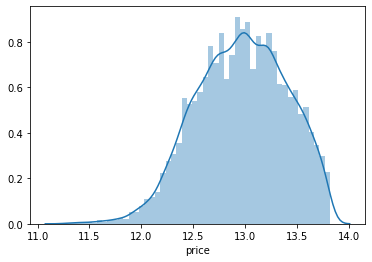

In [30]:
sns.distplot(df_small.price)

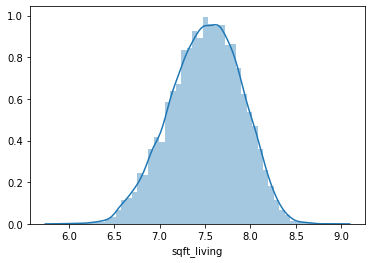

In [31]:
sns.distplot(df_small.sqft_living)

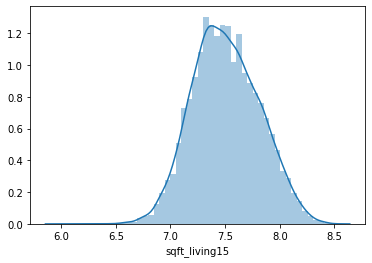

In [32]:
sns.distplot(df_small.sqft_living15)

In [37]:
df_small.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13040,5101400871,2015-05-24,13.006953,2,1.75,7.237059,6670,1.0,0.0,0.0,...,6,720,670.0,1941,0.0,98115,47.6914,-122.308,6.824374,6380
5632,7923600250,2015-05-15,13.017003,5,2.00,7.533694,7344,1.5,0.0,0.0,...,7,1870,0.0,1960,0.0,98007,47.5951,-122.144,7.533694,7650
15797,7129304540,2015-05-14,12.994530,5,2.00,7.265430,5600,1.5,0.0,0.0,...,6,1430,0.0,1947,0.0,98118,47.5192,-122.266,7.528332,5980
927,8730000270,2015-05-14,12.791078,2,2.75,7.222566,1140,2.0,0.0,0.0,...,8,1080,290.0,2009,0.0,98133,47.7052,-122.343,7.222566,1090
20456,5057100110,2015-05-14,13.080184,5,3.00,8.078068,6371,2.0,0.0,0.0,...,9,3223,0.0,2014,0.0,98042,47.3584,-122.163,7.590347,9008


In [34]:
# Pre-processing

y2 = df_small['price']

X2 = df_small.loc[:,['grade', 'sqft_living', 'sqft_living15']]

In [35]:
# Setting up the LEARNER
X = sm.add_constant(X2) #x is sqft_living
model_sm = sm.OLS(y2,X2)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 1.0
grade           -0.0502
sqft_living      0.6195
sqft_living15    1.1566
dtype: float64


In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.722e+06
Date:                Mon, 21 Oct 2019   Prob (F-statistic):                        0.00
Time:                        10:53:12   Log-Likelihood:                         -12189.
No. Observations:               20106   AIC:                                  2.438e+04
Df Residuals:                   20103   BIC:                                  2.441e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
grade            -0.0502      0.004    -12.759      0.000      -0.058      -0.043
sqft_living       0.6195      0.012     50.957      0.000       0.596       0.643
sqft_living15     1.1566      0.011    101.446      0.000       1.134       1.179
==============================================================================
Omnibus:                      308.378   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.018
Skew:                           0.151   Prob(JB):                     1.67e-48
Kurtosis:                       2.586   Cond. No.                         68.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""